# Global Covid-19 Vaccination Progress Analysis using Python, SQL, and Power BI

### About Dataset

Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded. Country level vaccination data is gathered and assembled in one single file. Then, this data file is merged with locations data file to include vaccination sources information. A second file, with manufacturers information, is included.

### Content
The data (country vaccinations) contains the following information:

Country- this is the country for which the vaccination information is provided;<br>
Country ISO Code - ISO code for the country;<br>
Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;<br>
Total number of vaccinations - this is the absolute number of total immunizations in the country;<br>
Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;<br>
Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;<br>
Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;<br>
Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;<br>
Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;<br>
Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;<br>
Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;<br>
Number of vaccinations per day - number of daily vaccination for that day and country;<br>
Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;<br>
Vaccines used in the country - total number of vaccines used in the country (up to date);<br>
Source name - source of the information (national authority, international organization, local organization etc.);<br>
Source website - website of the source of information;

### There is a second file added recently (country vaccinations by manufacturer), with the following columns:

Location - country;
Date - date;
Vaccine - vaccine type;
Total number of vaccinations - total number of vaccinations / current time and vaccine type.

### Key Questions
####1. Which countries have administered the most vaccinations?
This helps in understanding global vaccination distribution and identifying the countries leading in vaccination efforts.

####2. What were the key trends in daily vaccinations over time?
Identifying peaks and declines in daily vaccination rates helps in analyzing the impact of government policies, supply chains, and public response over time.

####3. How do vaccination rates compare between key countries, for example the US and Germany?
This comparison allows us to explore how similar nations with different healthcare infrastructures have managed their vaccination campaigns.

####4. Which continents have administered the most vaccinations?
Understanding regional vaccination distribution highlights disparities between continents and provides insight into which regions are lagging.

####5. What is the distribution of vaccines used globally, and which manufacturers are leading the vaccination campaigns?
This helps in identifying the dominant vaccine suppliers and the extent of their reach in different parts of the world.

####6. What trends can be observed in terms of vaccine distribution by continent?
This provides insights into the global reach of each manufacturer and which regions are relying on specific vaccines.

### Install necesary libraries


In [ ]:
!pip install pandas sqlalchemy


### Load data into dataframes

In [ ]:
import pandas as pd

# Load the datasets
country_vaccinations = pd.read_csv('country_vaccinations.csv')

country_vaccinations_by_manufacturer = pd.read_csv('country_vaccinations_by_manufacturer.csv')

# Display the first few rows - country_vaccinations
country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
# Display the first few rows - country_vaccinations_by_manufacturer
country_vaccinations_by_manufacturer.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


## Data Exploration & Cleaning using Python

In [ ]:
# Check the data types and any missing values - country_vaccinations
country_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90591 entries, 0 to 90590
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              90591 non-null  object 
 1   iso_code                             90591 non-null  object 
 2   date                                 90591 non-null  object 
 3   total_vaccinations                   45956 non-null  float64
 4   people_vaccinated                    43520 non-null  float64
 5   people_fully_vaccinated              40822 non-null  float64
 6   daily_vaccinations_raw               37394 non-null  float64
 7   daily_vaccinations                   90281 non-null  float64
 8   total_vaccinations_per_hundred       45956 non-null  float64
 9   people_vaccinated_per_hundred        43520 non-null  float64
 10  people_fully_vaccinated_per_hundred  40822 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
# Check the data types and any missing values - country_vaccinations_by_manufacturer
country_vaccinations_by_manufacturer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


### Handling missing values
####Overview
In this project, handling missing data is a crucial step to ensure the integrity and completeness of our dataset. Our approach involves first assessing the extent of missing data in each column, and then applying appropriate methods to handle these gaps effectively.

####Forward and Backward Filling:
This method replaces missing values with the last/next known value in the column. It is useful for time-series or sequential data where each value is expected to be similar to its preceding value. For example, in cumulative data like total_vaccinations or people_vaccinated, forward filling maintains the logical continuity of the cumulative counts by filling in missing values with the most recent known data.<br>

###Interpolation:
Definition: Interpolation estimates missing values by fitting a line or curve through known data points. It calculates missing values based on the values before and after the missing data, providing a more continuous estimate.



####Replacement with Zero:
For columns with very little missing data (less than 1% of the total entries), such as daily_vaccinations and daily_vaccinations_per_million, we shall replace missing values with zero. This method is chosen because the amount of missing data is minimal, and filling with zero provides a straightforward solution without significantly affecting the overall dataset. It assumes that the absence of data in these cases is due to non-availability rather than an actual count of zero.


In [ ]:
# Calculate percentage of missing values for each column
missing_values = country_vaccinations.isnull().mean() * 100
print(missing_values)

country                                 0.000000
iso_code                                0.000000
date                                    0.000000
total_vaccinations                     49.270899
people_vaccinated                      51.959908
people_fully_vaccinated                54.938129
daily_vaccinations_raw                 58.722169
daily_vaccinations                      0.342197
total_vaccinations_per_hundred         49.270899
people_vaccinated_per_hundred          51.959908
people_fully_vaccinated_per_hundred    54.938129
daily_vaccinations_per_million          0.342197
vaccines                                0.001104
source_name                             0.001104
source_website                          0.001104
dtype: float64


In [ ]:
# Handle missing values using forward filling and replacement with zero
country_vaccinations['total_vaccinations'] = country_vaccinations['total_vaccinations'].fillna(method='ffill')
country_vaccinations['people_vaccinated'] = country_vaccinations['people_vaccinated'].fillna(method='ffill')
country_vaccinations['people_fully_vaccinated'] = country_vaccinations['people_fully_vaccinated'].fillna(method='ffill')
country_vaccinations['daily_vaccinations_raw'] = country_vaccinations['daily_vaccinations_raw'].interpolate()
country_vaccinations['daily_vaccinations'] = country_vaccinations['daily_vaccinations'].fillna(0)
country_vaccinations['total_vaccinations_per_hundred'] = country_vaccinations['total_vaccinations_per_hundred'].fillna(method='ffill')
country_vaccinations['people_vaccinated_per_hundred'] = country_vaccinations['people_vaccinated_per_hundred'].fillna(method='ffill')
country_vaccinations['people_fully_vaccinated_per_hundred'] = country_vaccinations['people_fully_vaccinated_per_hundred'].fillna(method='ffill')
country_vaccinations['daily_vaccinations_per_million'] = country_vaccinations['daily_vaccinations_per_million'].fillna(0)
country_vaccinations = country_vaccinations.dropna(subset=['vaccines'])
country_vaccinations = country_vaccinations.dropna(subset=['source_name', 'source_website'])

# Verify the changes
print(country_vaccinations.isnull().sum())


country                                 0
iso_code                                0
date                                    0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                78
daily_vaccinations_raw                 94
daily_vaccinations                      0
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           0
people_fully_vaccinated_per_hundred    78
daily_vaccinations_per_million          0
vaccines                                0
source_name                             0
source_website                          0
dtype: int64


<ipython-input-8-c0df4b456ee6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations['total_vaccinations'] = country_vaccinations['total_vaccinations'].fillna(method='ffill')
<ipython-input-8-c0df4b456ee6>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations['people_vaccinated'] = country_vaccinations['people_vaccinated'].fillna(method='ffill')
<ipython-input-8-c0df4b456ee6>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations['people_fully_vaccinated'] = country_vaccinations['people_fully_vaccinated'].fillna(method='ffill')
<ipython-input-8-c0df4b456ee6>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bf

It looks like some missing values remain after applying forward filling, interpolation, and other methods. This could be due to rows at the beginning of the dataset that don’t have preceding values to fill from or certain irregularities in the data.

We can apply backward filling as a complementary step.

In [ ]:
# Apply backward filling
country_vaccinations['people_fully_vaccinated'] = country_vaccinations['people_fully_vaccinated'].fillna(method='ffill').fillna(method='bfill')
country_vaccinations['daily_vaccinations_raw'] = country_vaccinations['daily_vaccinations_raw'].interpolate().fillna(method='bfill')
country_vaccinations['people_fully_vaccinated_per_hundred'] = country_vaccinations['people_fully_vaccinated_per_hundred'].fillna(method='ffill').fillna(method='bfill')

# Verify changes
print(country_vaccinations.isnull().sum())


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


<ipython-input-9-c0d027f9656d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations['people_fully_vaccinated'] = country_vaccinations['people_fully_vaccinated'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-9-c0d027f9656d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations['daily_vaccinations_raw'] = country_vaccinations['daily_vaccinations_raw'].interpolate().fillna(method='bfill')
<ipython-input-9-c0d027f9656d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_vaccinations['people_fully_vaccinated_per_hundred'] = country_vaccinations['people_fully_vaccinated_per_hundred'].fillna(method='ffill').fillna(method='bfill')


##Duplicate values

In [ ]:
# Check for duplicates
country_vaccinations_duplicates = country_vaccinations.duplicated()
country_vaccinations_by_manufacturer_duplicates = country_vaccinations_by_manufacturer.duplicated()

# Print the number of duplicates
print(f'Total duplicates found: {country_vaccinations_duplicates.sum()}')
print(f'Total duplicates found: {country_vaccinations_by_manufacturer_duplicates.sum()}')

Total duplicates found: 0
Total duplicates found: 0


There are no duplicate values in both datasets

##Outliers
For detecting outliers in the country_vaccinations and country_vaccinations_by_manufacturer datasets, the most appropriate method depends on the distribution of the data.

The Five-Number Summary (IQR) method is best for Skewed distributions or when data is not normally distributed (as with real-world vaccination data, which often has a positive skew).

To determine the distribution of data, we shall visually inspect all numerical columns using histograms.


Histograms for country_vaccinations dataset:


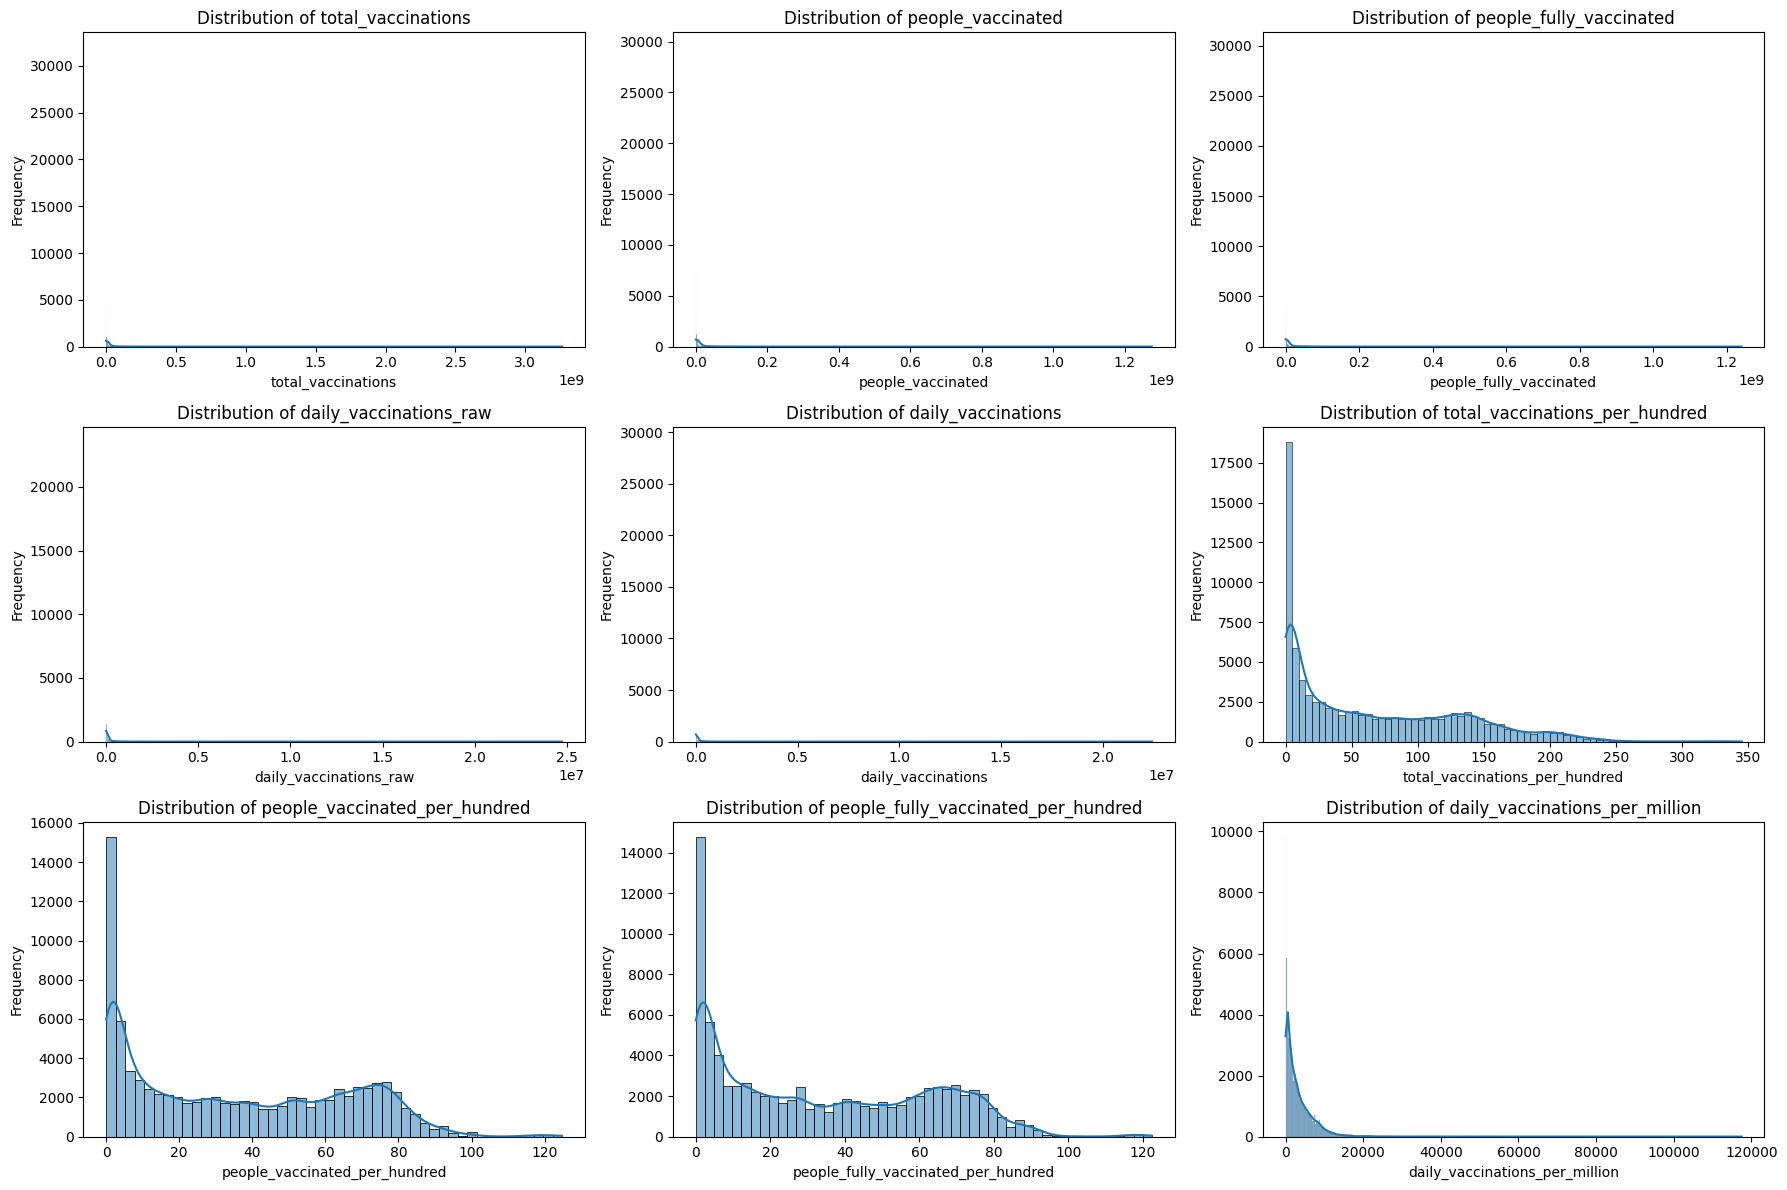

Histograms for country_vaccinations_by_manufacturer dataset:


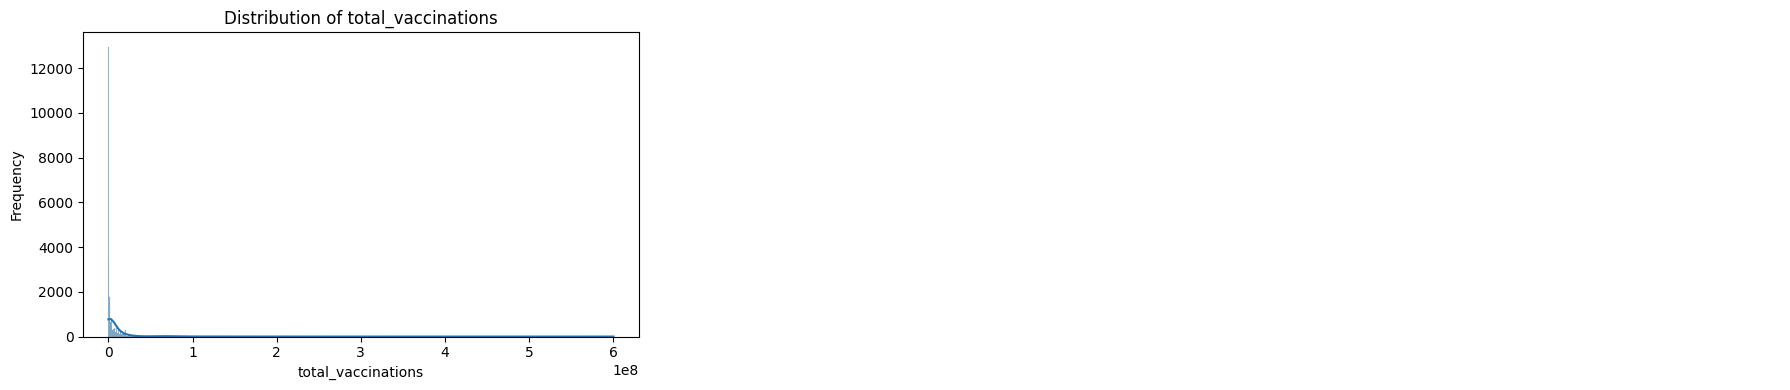

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot histograms for numerical columns in a dataset
def plot_histograms(df, dataset_name):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Determine the number of rows and columns for the grid
    num_columns = 3  # Number of columns in the grid
    num_rows = int(np.ceil(len(numerical_columns) / num_columns))

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot histograms
    for ax, column in zip(axes, numerical_columns):
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # Turn off unused subplots
    for ax in axes[len(numerical_columns):]:
        ax.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot histograms for country_vaccinations
print("Histograms for country_vaccinations dataset:")
plot_histograms(country_vaccinations, 'country_vaccinations')

# Plot histograms for country_vaccinations_by_manufacturer
print("Histograms for country_vaccinations_by_manufacturer dataset:")
plot_histograms(country_vaccinations_by_manufacturer, 'country_vaccinations_by_manufacturer')


####Observations:
All the histograms seem to start with very high values and gradually reduce, forming downward slopes, typically representing right-skewed distributions (also called positively skewed distributions) which confirm that the five-number summary method for detecting outliers is the most appropriate for our data.

Just to be a bit extra, let's use the <b>Kolmogorov-Smirnov Test:</b> Another test to check if the data follows a specific distribution (e.g., normal). A p-value less than 0.05 suggests the data is not normally distributed.



In [ ]:
from scipy.stats import kstest

stat, p = kstest(country_vaccinations['total_vaccinations_per_hundred'], 'norm')
print(f'Statistics={stat}, p={p}')
if p > 0.05:
    print('Data looks normally distributed')
else:
    print('Data does not look normally distributed')


Statistics=0.8360211594609668, p=0.0
Data does not look normally distributed


###Calculate the five-number summary
The five-number summary is a simple way to describe the spread and shape of a set of data using five key values:

Minimum: The smallest value in the dataset.<br>
First Quartile (Q1): The point where 25% of the data falls below it.<br>
Median: The middle value that separates the dataset into two equal halves.<br>
Third Quartile (Q3): The point where 75% of the data falls below it.<br>
Maximum: The largest value in the dataset.<br>

Together, these numbers give a snapshot of how the data is distributed and help identify any potential outliers.

In [ ]:
country_vaccinations.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,8.651200e+04,8.651200e+04,8.651200e+04,8.651200e+04,8.651200e+04,86512.000000,86512.000000,86512.000000,86512.000000
mean,2.589619e+07,1.370965e+07,1.164831e+07,1.481549e+05,1.308517e+05,67.176780,35.471258,33.917035,3245.792248
std,1.614746e+08,8.050294e+07,7.025935e+07,8.018542e+05,7.669487e+05,65.257241,29.579210,28.575444,3932.156455
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.185448e+05,7.841400e+04,6.232775e+04,2.081721e+03,8.770000e+02,6.960000,5.540000,5.570000,629.000000
50%,1.082319e+06,7.193195e+05,6.677125e+05,1.155850e+04,7.245000e+03,47.415000,30.740000,28.150000,2036.000000
75%,8.265793e+06,4.529705e+06,4.166614e+06,5.814381e+04,4.370450e+04,118.490000,63.100000,60.610000,4667.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [ ]:
country_vaccinations_by_manufacturer.describe()

,total_vaccinations
count,3.562300e+04
mean,1.508357e+07
std,5.181768e+07
min,0.000000e+00
25%,9.777600e+04
50%,1.305506e+06
75%,7.932423e+06
max,6.005200e+08


####Detecting outliers
To detect outliers using the five-number summary (minimum, first quartile, median, third quartile, and maximum), you can calculate the Interquartile Range (IQR) for each numerical column and identify data points that fall below 𝑄1 − 1.5 × IQR  or above 𝑄3 + 1.5 × IQR.

IQR = Q3 - Q1.

In [ ]:
import pandas as pd

def detect_outliers(df):
    # Create an empty dictionary to store outlier information
    outliers_info = {}

    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Calculate outliers for each numerical column
    for column in numerical_columns:
        # Calculate five-number summary
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Store outlier information
        outliers_info[column] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers),
            'outliers': outliers
        }

        # Print outlier summary
        print(f'Column: {column}')
        print(f'  Q1: {Q1}')
        print(f'  Q3: {Q3}')
        print(f'  IQR: {IQR}')
        print(f'  Lower bound: {lower_bound}')
        print(f'  Upper bound: {upper_bound}')
        print(f'  Number of outliers: {len(outliers)}')
        print()

    return outliers_info

# Detect outliers in country_vaccinations dataset
print("Detecting outliers in country_vaccinations dataset:")
outliers_country_vaccinations = detect_outliers(country_vaccinations)

# Detect outliers in country_vaccinations_by_manufacturer dataset
print("Detecting outliers in country_vaccinations_by_manufacturer dataset:")
outliers_country_vaccinations_by_manufacturer = detect_outliers(country_vaccinations_by_manufacturer)


Detecting outliers in country_vaccinations dataset:
Column: total_vaccinations
  Q1: 118544.75
  Q3: 8265793.0
  IQR: 8147248.25
  Lower bound: -12102327.625
  Upper bound: 20486665.375
  Number of outliers: 12219

Column: people_vaccinated
  Q1: 78414.0
  Q3: 4529705.0
  IQR: 4451291.0
  Lower bound: -6598522.5
  Upper bound: 11206641.5
  Number of outliers: 12371

Column: people_fully_vaccinated
  Q1: 62327.75
  Q3: 4166614.0
  IQR: 4104286.25
  Lower bound: -6094101.625
  Upper bound: 10323043.375
  Number of outliers: 12318

Column: daily_vaccinations_raw
  Q1: 2081.7210495166723
  Q3: 58143.81179775281
  IQR: 56062.090748236136
  Lower bound: -82011.41507283754
  Upper bound: 142236.94792010702
  Number of outliers: 12503

Column: daily_vaccinations
  Q1: 877.0
  Q3: 43704.5
  IQR: 42827.5
  Lower bound: -63364.25
  Upper bound: 107945.75
  Number of outliers: 13196

Column: total_vaccinations_per_hundred
  Q1: 6.96
  Q3: 118.49
  IQR: 111.53
  Lower bound: -160.335
  Upper bound:

####Observations:
Many of the columns, particularly those with large ranges (e.g., total_vaccinations, people_vaccinated, daily_vaccinations), have a high number of outliers. This is consistent with positively skewed distributions where extreme values are prevalent.

Let's visualize these outliers to better understand their distribution using boxplots.

Boxplots for country_vaccinations dataset:


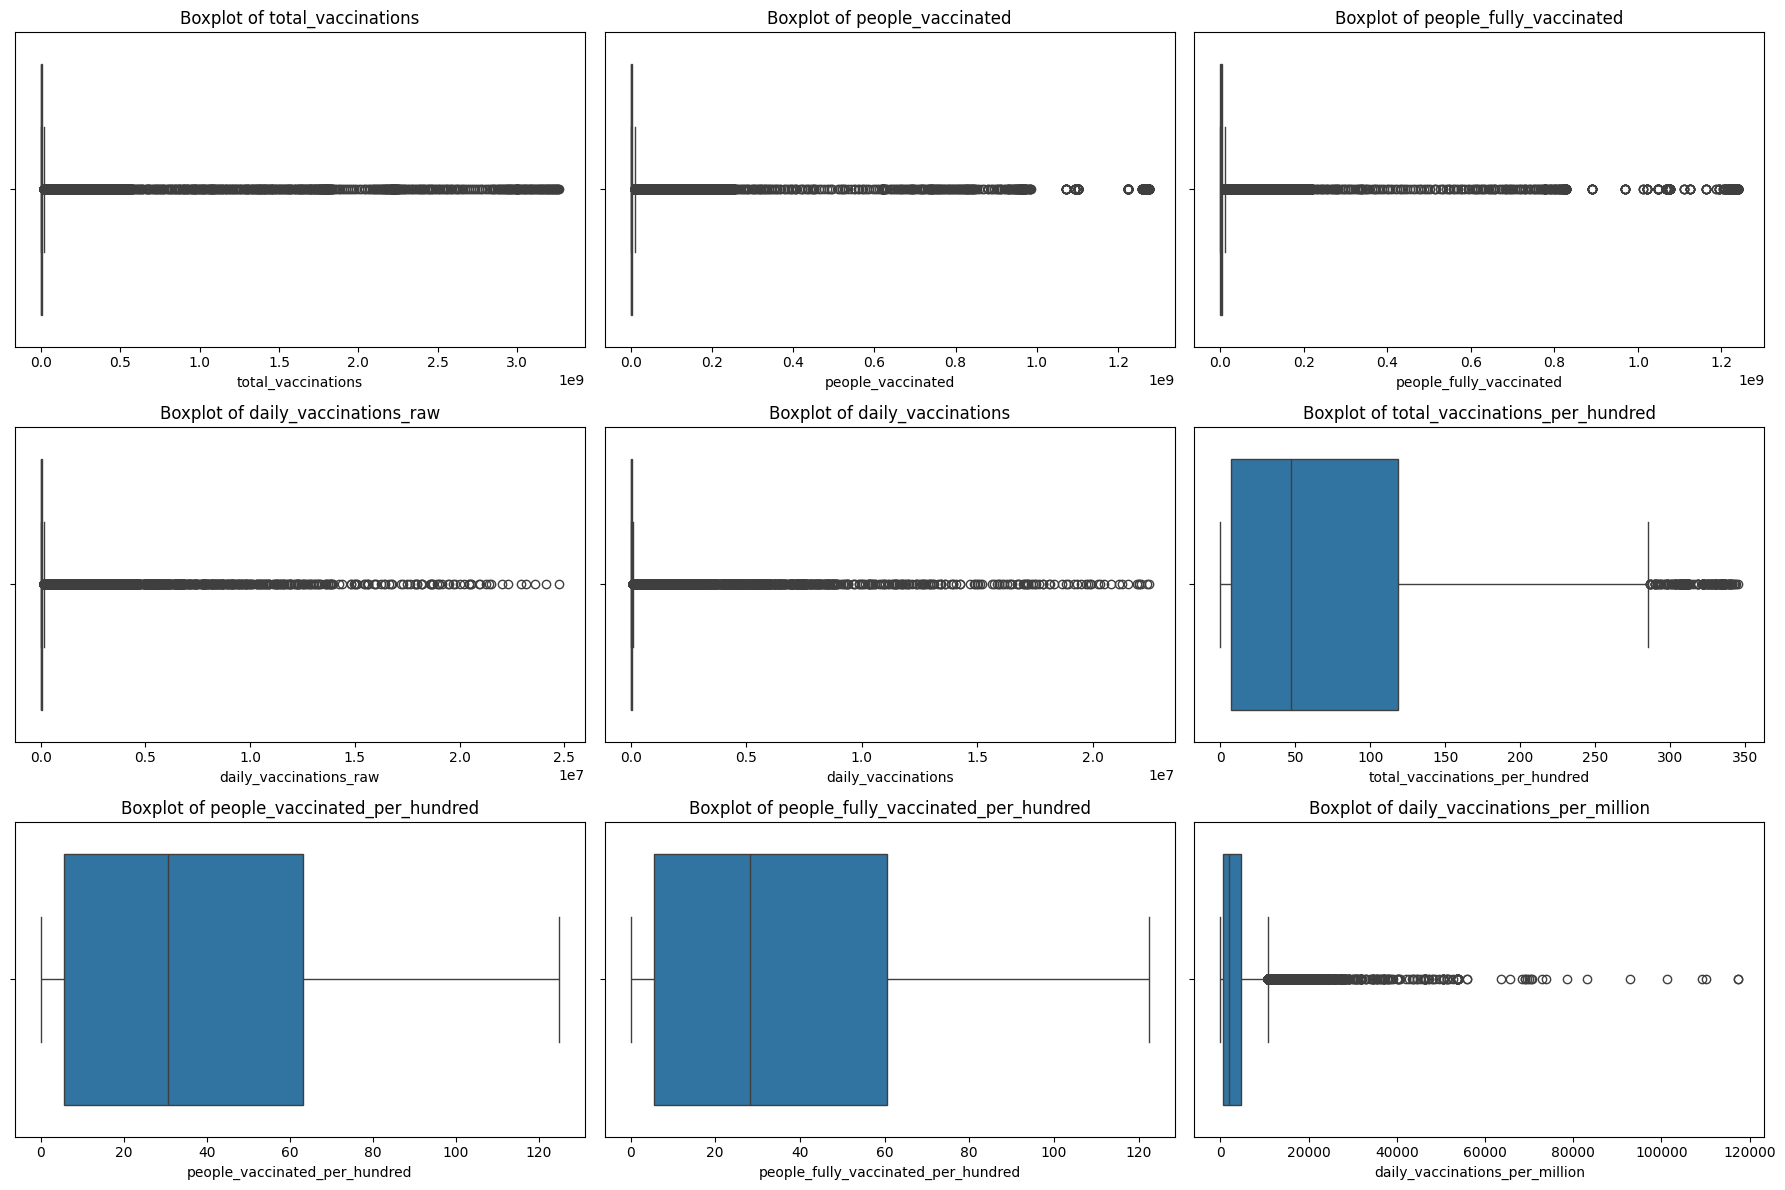

Boxplots for country_vaccinations_by_manufacturer dataset:


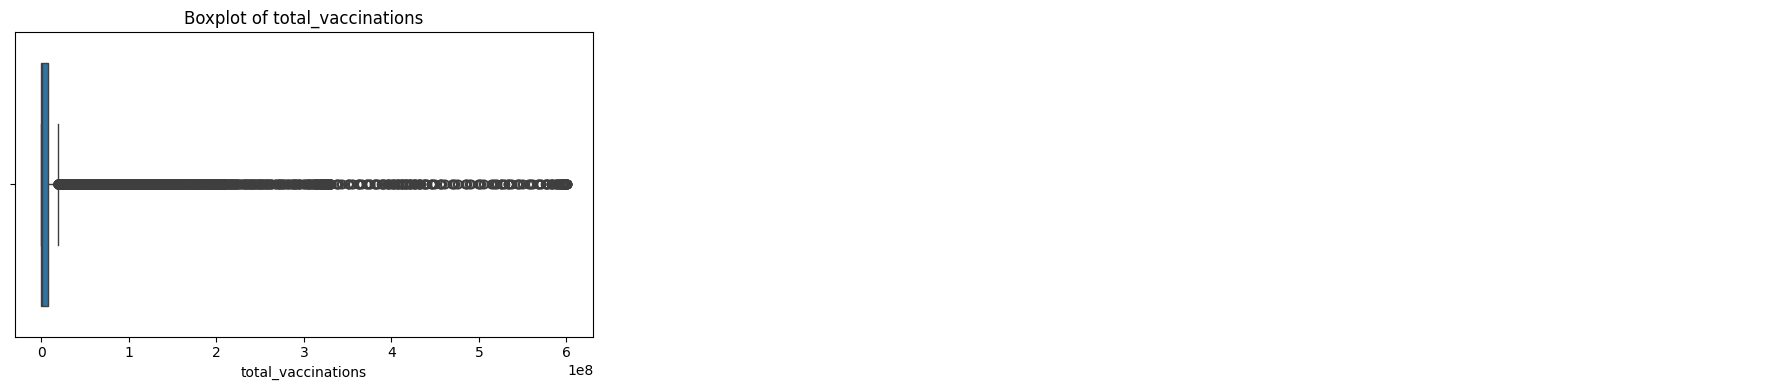

In [ ]:
def plot_boxplots(df, dataset_name):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Determine the number of rows and columns for the grid
    num_columns = 3
    num_rows = int(np.ceil(len(numerical_columns) / num_columns))

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 4))
    axes = axes.flatten()

    # Plot boxplots
    for ax, column in zip(axes, numerical_columns):
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f'Boxplot of {column}')
        ax.set_xlabel(column)

    # Turn off unused subplots
    for ax in axes[len(numerical_columns):]:
        ax.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot boxplots for country_vaccinations
print("Boxplots for country_vaccinations dataset:")
plot_boxplots(country_vaccinations, 'country_vaccinations')

# Plot boxplots for country_vaccinations_by_manufacturer
print("Boxplots for country_vaccinations_by_manufacturer dataset:")
plot_boxplots(country_vaccinations_by_manufacturer, 'country_vaccinations_by_manufacturer')


Further analysis of outliers is crucial to understanding whether they are errors, significant variations, or something else. However, given the extraordinary circumstances of a global pandemic, outliers in vaccination data can be understood as part of the complex and dynamic nature of the situation. Rather than indicating errors, these outliers may reflect the real-world impacts of policy changes, data reporting practices, global disparities, and external factors. Therefore, it's essential to interpret these outliers within the context of the pandemic and consider them as part of the broader landscape of vaccination efforts.

When analyzing such data, it's crucial to focus on understanding the underlying reasons for these outliers and their implications rather than treating them as anomalies. This approach helps in making informed decisions and ensuring that the analysis accurately reflects the realities of the pandemic.

###Handling the Date Column (DataType and Feature Extraction)
The date column is essential for time-series analysis, so it's important to ensure that it's in the proper format (datetime). By converting this column, we can easily perform operations like sorting by date, aggregating data by month or year, and handling missing or incorrect entries effectively.

We'll also extract individual components such as year, month, and day for flexibility in our analysis and repeat the process for the country_vaccinations_by_manufacturer dataframe.

In [ ]:
# Convert 'date' column to datetime format
country_vaccinations['date'] = pd.to_datetime(country_vaccinations['date'], errors='coerce')

# Drop rows where 'date' could not be converted
country_vaccinations = country_vaccinations.dropna(subset=['date'])

# Extract year, month, and day as separate columns
country_vaccinations['year'] = country_vaccinations['date'].dt.year
country_vaccinations['month'] = country_vaccinations['date'].dt.month
country_vaccinations['day'] = country_vaccinations['date'].dt.day

# Verify the changes
country_vaccinations[['date', 'year', 'month', 'day']].head()


<class 'pandas.core.frame.DataFrame'>
Index: 90590 entries, 0 to 90590
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              90590 non-null  object        
 1   iso_code                             90590 non-null  object        
 2   date                                 90590 non-null  datetime64[ns]
 3   total_vaccinations                   90590 non-null  float64       
 4   people_vaccinated                    90590 non-null  float64       
 5   people_fully_vaccinated              90590 non-null  float64       
 6   daily_vaccinations_raw               90590 non-null  float64       
 7   daily_vaccinations                   90590 non-null  float64       
 8   total_vaccinations_per_hundred       90590 non-null  float64       
 9   people_vaccinated_per_hundred        90590 non-null  float64       
 10  people_fully_va

In [ ]:
# country_vaccinations_by_manufacturer
country_vaccinations_by_manufacturer['date'] = pd.to_datetime(country_vaccinations_by_manufacturer['date'], errors='coerce')

country_vaccinations_by_manufacturer = country_vaccinations_by_manufacturer.dropna(subset=['date'])

country_vaccinations_by_manufacturer['year'] = country_vaccinations_by_manufacturer['date'].dt.year
country_vaccinations_by_manufacturer['month'] = country_vaccinations_by_manufacturer['date'].dt.month
country_vaccinations_by_manufacturer['day'] = country_vaccinations_by_manufacturer['date'].dt.day

# Verify changes
country_vaccinations_by_manufacturer[['date', 'year', 'month', 'day']].head()


,date,year,month,day
0,2020-12-29,2020,12,29
1,2020-12-29,2020,12,29
2,2020-12-29,2020,12,29
3,2020-12-29,2020,12,29
4,2020-12-30,2020,12,30


# Data Aggregation using SQL and Visualization using Python

###Create a Database and Import the Data
We can create a database and import the cleaned data from our pandas DataFrame into a SQL database using SQLite or MySQL. Here's a simple example of setting up an SQLite database and importing your cleaned dataset:

In [ ]:
import sqlite3

# Create an SQLite database
conn = sqlite3.connect('vaccination_data.db')

# Write the DataFrame to the SQL database
country_vaccinations.to_sql('vaccinations', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

90590

This creates an SQLite database called vaccination_data.db and saves our cleaned DataFrame into a table called vaccinations.

###Perform SQL Queries with accompanying visualizations
Once the database is set up, we can start running queries to aggregate and filter data for further analysis. Below are some SQL query examples that we can execute using Python’s sqlite3 library:

####1. Total Vaccinations Per Country:
Since the number of countries in the dataset is too big we'll focus on the top ten countries. To visualize the total number of vaccinations administered in the top 10 countries, we need to first aggregate the total vaccinations per country and then select the top 10 countries based on these totals. This allows us to focus on the countries with the most significant vaccination efforts.



In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

query = '''
SELECT
    country,
    SUM(total_vaccinations) AS total_vaccinations
FROM
    vaccinations
GROUP BY
    country
ORDER BY
    total_vaccinations DESC
LIMIT 10;
'''

# Execute the SQL query and load the result into a Pandas DataFrame
top_total_vaccinations = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Preview the DataFrame
print(top_total_vaccinations)

          country  total_vaccinations
0           China        7.117724e+11
1           India        3.268041e+11
2   United States        3.079548e+11
3          Brazil        8.144641e+10
4       Indonesia        5.800574e+10
5         Vietnam        5.129630e+10
6           Japan        4.825801e+10
7         Germany        3.898283e+10
8  United Kingdom        3.699238e+10
9          Mexico        3.616514e+10


<ipython-input-51-49d574dd939f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='total_vaccinations', data=top_total_vaccinations, palette='Blues_d')


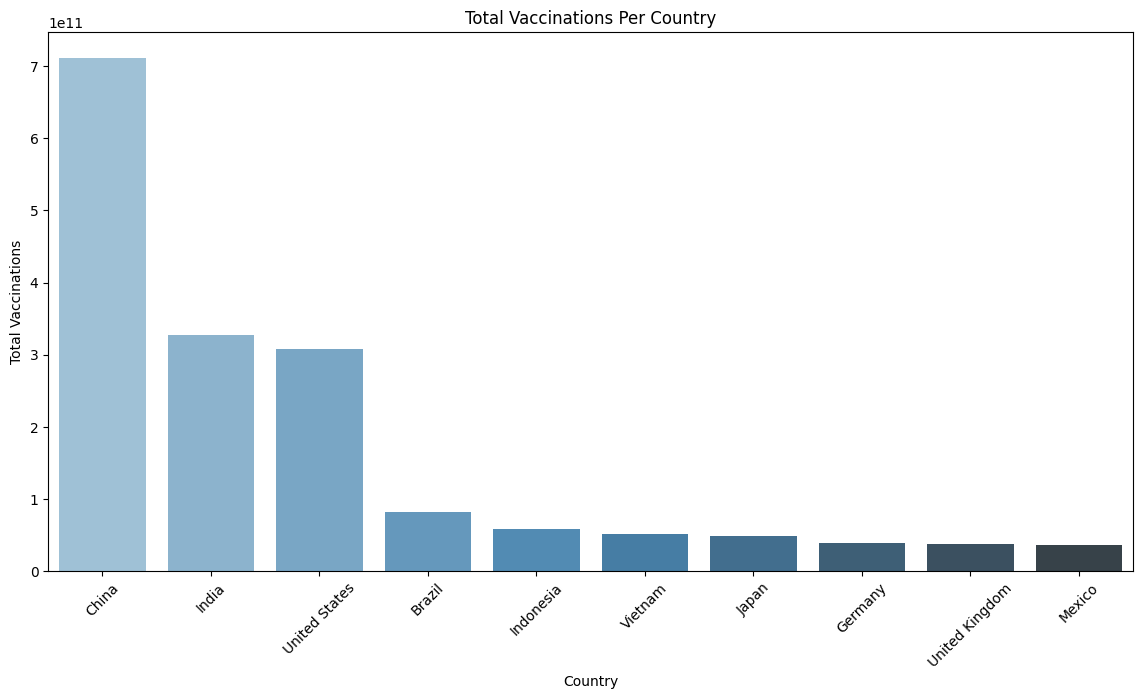

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='total_vaccinations', data=top_total_vaccinations, palette='Blues_d')
plt.title('Total Vaccinations Per Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.show()

####Findings:
China leads the pack with the most total vaccinations, followed by India and the US.

####2. Monthly Average Daily Vaccinations Across All Countries:
This query gets the average daily vaccinations for all countries grouped by month.

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

query = '''
SELECT
    strftime('%Y-%m', date) AS month,
    AVG(daily_vaccinations) AS avg_daily_vaccinations
FROM
    vaccinations
GROUP BY
    month
ORDER BY
    month;
'''

# Execute the SQL query and load the result into a Pandas DataFrame
monthly_avg_daily_vaccinations = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Preview the DataFrame
print(monthly_avg_daily_vaccinations)

      month  avg_daily_vaccinations
0   2021-02            93153.975989
1   2021-03            86658.466500
2   2021-04           103951.032317
3   2021-05           126873.530305
4   2021-06           172084.322216
5   2021-07           152725.613914
6   2021-08           175582.004613
7   2021-09           150169.907924
8   2021-10           126820.962994
9   2021-11           153364.948281
10  2021-12           170648.376501
11  2022-01           126470.152851


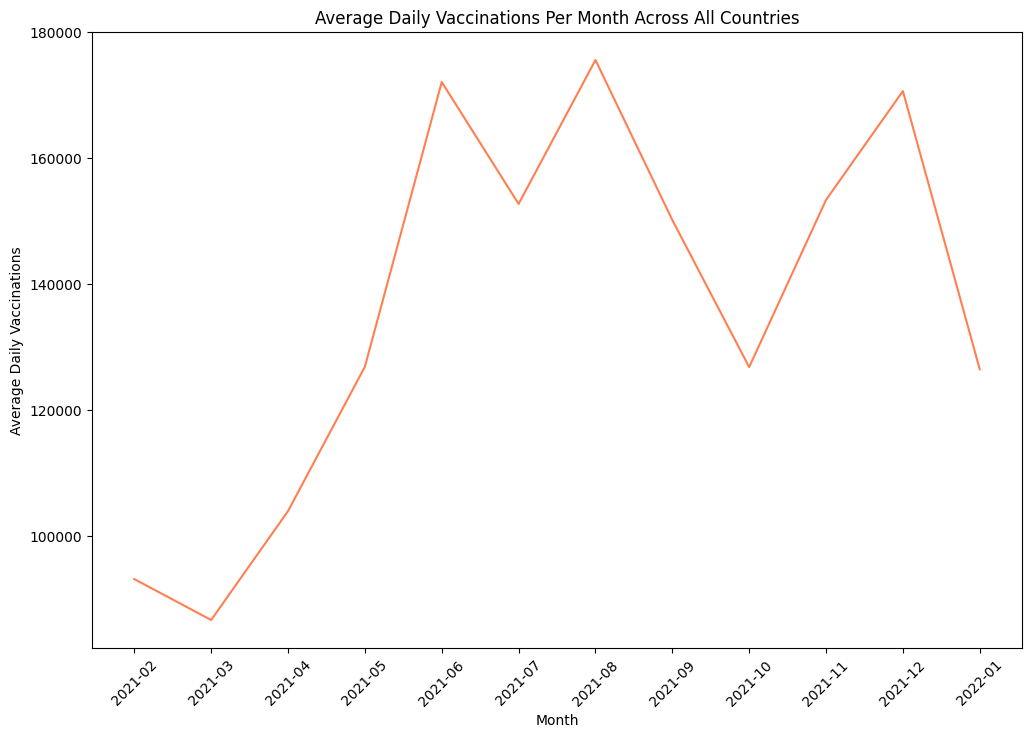

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='avg_daily_vaccinations', data=monthly_avg_daily_vaccinations, color='coral')
plt.title('Average Daily Vaccinations Per Month Across All Countries')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Daily Vaccinations')
plt.show()


####Findings:
There were significant rises in daily vaccinations in June, August, and December of 2021. There were also two significant decreases in October 2021 and January 2022.

####3. Comparison of vaccination rate between two countries:
This SQL query compares the total vaccination rates between two selected countries over time, grouped by month.

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

query = '''
SELECT
    country,
    strftime('%Y-%m', date) AS month,
    total_vaccinations_per_hundred
FROM
    vaccinations
WHERE
    country IN ('United States', 'Germany')
ORDER BY
    month;
'''

# Execute the SQL query and load the result into a Pandas DataFrame
vaccination_rate_comparison = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Preview the DataFrame
print(vaccination_rate_comparison)

            country    month  total_vaccinations_per_hundred
0           Germany  2020-12                            0.03
1           Germany  2020-12                            0.05
2           Germany  2020-12                            0.11
3           Germany  2020-12                            0.19
4           Germany  2020-12                            0.25
...             ...      ...                             ...
1321  United States  2022-03                          168.63
1322  United States  2022-03                          168.68
1323  United States  2022-03                          168.71
1324  United States  2022-03                          168.72
1325  United States  2022-03                          168.72

[1326 rows x 3 columns]


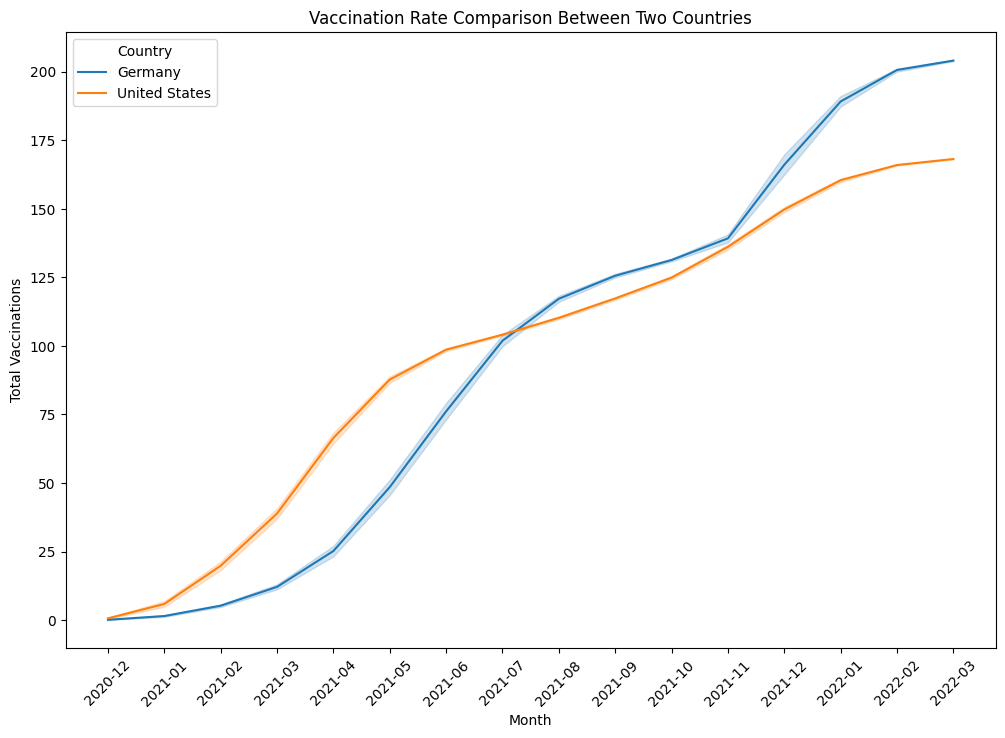

In [ ]:
# Plot vaccination rate comparison between two countries
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='total_vaccinations_per_hundred', hue='country', data=vaccination_rate_comparison, palette='tab10')
plt.title('Vaccination Rate Comparison Between Two Countries')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.show()

####Findings:
The two countries(Germany & US) have similar trajectories in regard to vaccination rate over time with Germany coming out on top at the end of the time duration

### Regional Analysis using Geopandas
By grouping data by continent, we can analyze vaccination trends and totals across different regions, helping to identify regional disparities or successes. It can also provide insights into regional policy effectiveness and help tailor public health strategies.


####Add Continent Column to the Dataset
Using geopandas:<br>
Geopandas provides country and continent data and can be a useful tool.

In [ ]:
!pip install geopandas

In [ ]:
# Get a list of unique countries
unique_countries = country_vaccinations['country'].unique()

# Display the unique countries
# print(unique_countries)


In [ ]:
import geopandas as gpd

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract country to continent mapping
continent_mapping_df = world[['name', 'continent']].rename(columns={'name': 'country'})

# Check if 'continent' already exists in the main DataFrame and drop it if so
if 'continent' in country_vaccinations.columns:
    country_vaccinations = country_vaccinations.drop(columns=['continent'])

# Merge your main DataFrame with the continent mapping DataFrame
country_vaccinations = country_vaccinations.merge(continent_mapping_df, on='country', how='left')

# Check the result
country_vaccinations.head()


<ipython-input-101-212f18af5e83>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day,continent
0,Afghanistan,AFG,2021-02-22,0.0,0.0,55624.0,2859.0,0.0,0.0,0.0,0.14,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22,Asia
1,Afghanistan,AFG,2021-02-23,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23,Asia
2,Afghanistan,AFG,2021-02-24,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24,Asia
3,Afghanistan,AFG,2021-02-25,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25,Asia
4,Afghanistan,AFG,2021-02-26,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26,Asia


####Check for missing values within the new continent column:
1. Determine which countries in country_vaccinations did not get matched with a continent.

2. Manually map the countries to their respective continents and fill in the missing data without affecting the existing non-NaN values


In [ ]:
# Get unique values from each column
unique_continent = country_vaccinations['continent'].unique()

print("Unique values in continent:", unique_continent)

Unique values in continent: ['Asia' 'Europe' 'Africa' nan 'South America' 'Oceania' 'North America']


In [ ]:
# Find rows with missing continent values
missing_continent = country_vaccinations[country_vaccinations['continent'].isna()]

# Get a list of countries with missing continent information
missing_countries = missing_continent['country'].unique()

print("Countries with missing continent information:", missing_countries)


Countries with missing continent information: ['Andorra' 'Anguilla' 'Antigua and Barbuda' 'Aruba' 'Bahrain' 'Barbados'
 'Bermuda' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'British Virgin Islands' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Comoros' 'Cook Islands' "Cote d'Ivoire"
 'Curacao' 'Democratic Republic of Congo' 'Dominica' 'Dominican Republic'
 'England' 'Equatorial Guinea' 'Eswatini' 'Faeroe Islands'
 'Falkland Islands' 'French Polynesia' 'Gibraltar' 'Grenada' 'Guernsey'
 'Hong Kong' 'Isle of Man' 'Jersey' 'Kiribati' 'Liechtenstein' 'Macao'
 'Maldives' 'Malta' 'Mauritius' 'Monaco' 'Montserrat' 'Nauru' 'Niue'
 'Northern Cyprus' 'Northern Ireland' 'Pitcairn' 'Saint Helena'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'Samoa' 'San Marino' 'Sao Tome and Principe' 'Scotland' 'Seychelles'
 'Singapore' 'Sint Maarten (Dutch part)' 'Solomon Islands' 'South Sudan'
 'Timor' 'Tokelau' 'Tonga' 'Turks and Caicos Islands' 'Tuval

####Continent Mapping

In [ ]:
import pandas as pd

# Create a dictionary for country to continent mapping
continent_mapping = {
    'Andorra': 'Europe',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Aruba': 'North America',
    'Bahrain': 'Asia',
    'Barbados': 'North America',
    'Bermuda': 'North America',
    'Bonaire Sint Eustatius and Saba': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'British Virgin Islands': 'North America',
    'Cape Verde': 'Africa',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Comoros': 'Africa',
    'Cook Islands': 'Oceania',
    "Cote d'Ivoire": 'Africa',
    'Curacao': 'North America',
    'Democratic Republic of Congo': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'England': 'Europe',
    'Equatorial Guinea': 'Africa',
    'Eswatini': 'Africa',
    'Faeroe Islands': 'Europe',
    'Falkland Islands': 'South America',
    'French Polynesia': 'Oceania',
    'Gibraltar': 'Europe',
    'Grenada': 'North America',
    'Guernsey': 'Europe',
    'Hong Kong': 'Asia',
    'Isle of Man': 'Europe',
    'Jersey': 'Europe',
    'Kiribati': 'Oceania',
    'Liechtenstein': 'Europe',
    'Macao': 'Asia',
    'Maldives': 'Asia',
    'Malta': 'Europe',
    'Mauritius': 'Africa',
    'Monaco': 'Europe',
    'Montserrat': 'North America',
    'Nauru': 'Oceania',
    'Niue': 'Oceania',
    'Northern Cyprus': 'Asia',
    'Northern Ireland': 'Europe',
    'Pitcairn': 'Oceania',
    'Saint Helena': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Scotland': 'Europe',
    'Seychelles': 'Africa',
    'Singapore': 'Asia',
    'Sint Maarten (Dutch part)': 'North America',
    'Solomon Islands': 'Oceania',
    'South Sudan': 'Africa',
    'Timor': 'Asia',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'United States': 'North America',
    'Wales': 'Europe',
    'Wallis and Futuna': 'Oceania'
}

# Replace only NaN values in the continent column
country_vaccinations.loc[country_vaccinations['continent'].isna(), 'continent'] = country_vaccinations['country'].map(continent_mapping)

# Verify the changes
print(country_vaccinations['continent'].unique())


['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [ ]:
country_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90590 entries, 0 to 90589
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              90590 non-null  object        
 1   iso_code                             90590 non-null  object        
 2   date                                 90590 non-null  datetime64[ns]
 3   total_vaccinations                   90590 non-null  float64       
 4   people_vaccinated                    90590 non-null  float64       
 5   people_fully_vaccinated              90590 non-null  float64       
 6   daily_vaccinations_raw               90590 non-null  float64       
 7   daily_vaccinations                   90590 non-null  float64       
 8   total_vaccinations_per_hundred       90590 non-null  float64       
 9   people_vaccinated_per_hundred        90590 non-null  float64       
 10  people_ful

###Regional Analysis: Country Vaccinations By Manufacturer

In [ ]:
unique_countries_by_manufacturer = country_vaccinations_by_manufacturer['location'].unique()

unique_countries_by_manufacturer

array(['Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Malta', 'Nepal', 'Netherlands', 'Norway', 'Peru',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United States', 'Uruguay', 'European Union'],
      dtype=object)

The country_vaccinations_by_manufacturer dataframe has a much shorter list of unique countries so it should be much easier to deal with.

In [ ]:
# Create a dictionary for country to continent mapping
continent_mapping_by_manufacturer = {
    'Argentina': 'South America',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Chile': 'South America',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Ecuador': 'South America',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'Norway': 'Europe',
    'Peru': 'South America',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Ukraine': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'European Union': 'Europe'
}

# Add a new column 'region' to the DataFrame based on the mapping
country_vaccinations_by_manufacturer['region'] = country_vaccinations_by_manufacturer['location'].map(continent_mapping_by_manufacturer)

# Check the result
country_vaccinations_by_manufacturer.head()


,location,date,vaccine,total_vaccinations,year,month,day,region
0,Argentina,2020-12-29,Moderna,2,2020,12,29,South America
1,Argentina,2020-12-29,Oxford/AstraZeneca,3,2020,12,29,South America
2,Argentina,2020-12-29,Sinopharm/Beijing,1,2020,12,29,South America
3,Argentina,2020-12-29,Sputnik V,20481,2020,12,29,South America
4,Argentina,2020-12-30,Moderna,2,2020,12,30,South America


In [ ]:
unique_region = country_vaccinations_by_manufacturer['region'].unique()

print("Unique values in region:", unique_region)

Unique values in region: ['South America' 'Europe' 'Asia' 'Africa' 'North America']


##More Aggregations & Visualizations
####Aggregations:
We shall aggregate vaccination data by continent and year to understand overall trends in vaccination.

####Visualizations:
We shall use bar plots to visualize total vaccinations by continent and manufacturer.

These visualizations will help in understanding the distribution of vaccinations across different continents and manufacturers before moving on to Power BI to create an interactive dashboard.

We shall need to overwrite the original table with our updated DataFrame to ensure that all columns, including the new 'continent' column, are accurately reflected in the SQLite database.

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

# Write the updated DataFrame to the SQL database, replacing the existing table
country_vaccinations.to_sql('vaccinations', conn, if_exists='replace', index=False)

# Verify the changes
query = 'SELECT * FROM vaccinations LIMIT 5'
sample_data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the sample data to verify the changes
sample_data


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day,continent
0,Afghanistan,AFG,2021-02-22 00:00:00,0.0,0.0,55624.0,2859.0,0.0,0.0,0.0,0.14,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22,Asia
1,Afghanistan,AFG,2021-02-23 00:00:00,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23,Asia
2,Afghanistan,AFG,2021-02-24 00:00:00,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24,Asia
3,Afghanistan,AFG,2021-02-25 00:00:00,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25,Asia
4,Afghanistan,AFG,2021-02-26 00:00:00,0.0,0.0,55624.0,2859.0,1367.0,0.0,0.0,0.14,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26,Asia


####4. Total Vaccinations by Region (Continent):

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

query = '''
SELECT
    continent,
    SUM(total_vaccinations) AS total_vaccinations
FROM
    vaccinations
GROUP BY
    continent
ORDER BY
    total_vaccinations DESC;
'''

# Execute the SQL query and load the result into a Pandas DataFrame
total_vaccinations_by_continent = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

print(total_vaccinations_by_continent)

       continent  total_vaccinations
0           Asia        1.490708e+12
1  North America        3.860208e+11
2         Europe        3.224196e+11
3  South America        1.629615e+11
4         Africa        6.292638e+10
5        Oceania        1.234575e+10


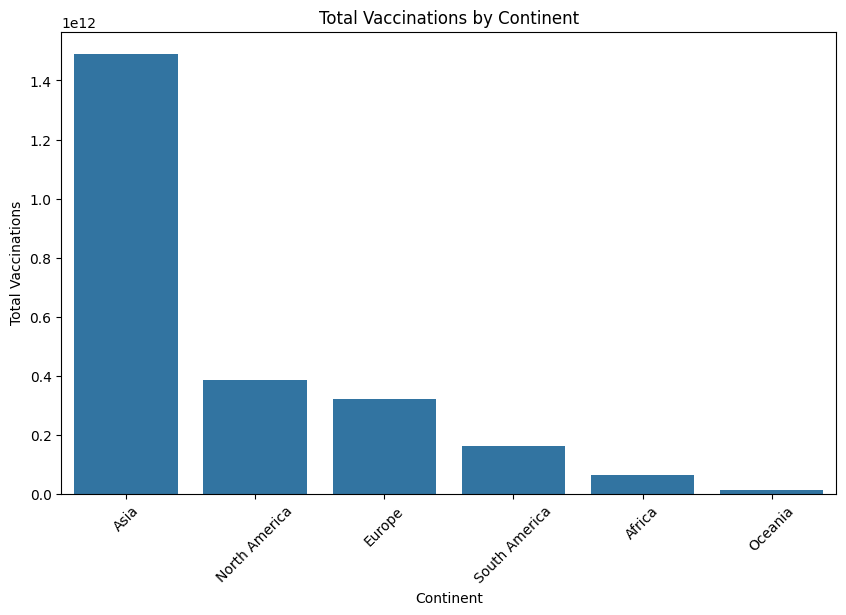

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='total_vaccinations', data=total_vaccinations_by_continent)
plt.title('Total Vaccinations by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.show()


####Findings:
Asia had the most vaccinations by a significant margin, followed by North America and Europe. Africa and Oceania had the least.

###Country Vaccinations By Manufacturer

In [ ]:
# Create an SQLite database
conn = sqlite3.connect('vaccination_data.db')

# Write the DataFrame to the SQL database
country_vaccinations_by_manufacturer.to_sql('manufacturer', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

####5. Total Vaccinations per Region

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

query = '''
SELECT
    region,
    SUM(total_vaccinations) AS total_vaccinations
FROM
    manufacturer
GROUP BY
    region
ORDER BY
    total_vaccinations DESC;
'''

# Execute the SQL query and load the result into a Pandas DataFrame
total_vaccinations_per_region = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

print(total_vaccinations_per_region)

          region  total_vaccinations
0         Europe        321437879798
1  North America        139944068653
2  South America         45394511580
3           Asia         29724838285
4         Africa           820872071


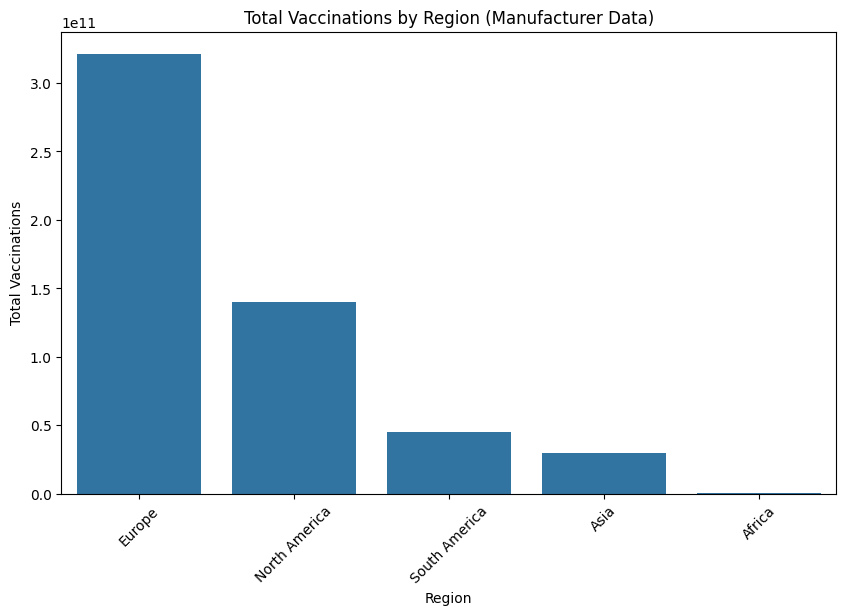

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='total_vaccinations', data=total_vaccinations_per_region)
plt.title('Total Vaccinations by Region (Manufacturer Data)')
plt.xlabel('Region')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.show()


####Findings:
According to the manufacturer data, Europe leads the way in total vacciations made followed by North America. Africa has the least.

####6. Total Vaccinations by Manufacturer

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('vaccination_data.db')

query = '''
SELECT
    vaccine,
    SUM(total_vaccinations) AS total_vaccinations
FROM
    manufacturer
GROUP BY
    vaccine
ORDER BY
    total_vaccinations DESC;
'''

# Execute the SQL query and load the result into a Pandas DataFrame
total_vaccinations_by_manufacturer = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

print(total_vaccinations_by_manufacturer)

              vaccine  total_vaccinations
0     Pfizer/BioNTech        344835955037
1             Moderna        103072147621
2  Oxford/AstraZeneca         46451509497
3             Sinovac         13407163275
4     Johnson&Johnson         12611375881
5   Sinopharm/Beijing         10877006517
6           Sputnik V          5787343199
7             CanSino           271397675
8             Novavax             8268113
9             Covaxin                3572


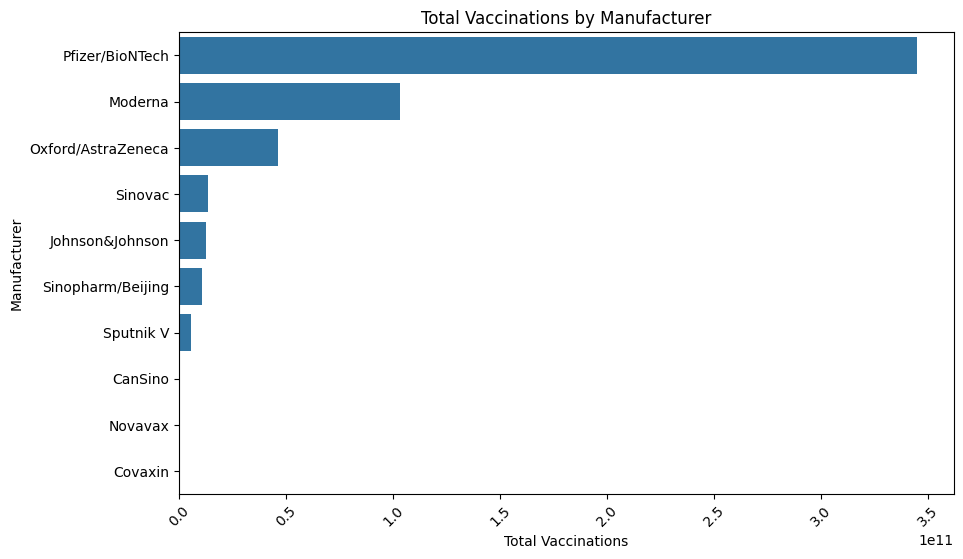

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='vaccine', x='total_vaccinations', data=total_vaccinations_by_manufacturer)
plt.title('Total Vaccinations by Manufacturer')
plt.xlabel('Total Vaccinations')
plt.ylabel('Manufacturer')
plt.xticks(rotation=45)
plt.show()


####Findings:
Pfizer has the most vaccinations by a significant margin, followed by Moderna. CanSino, Novavax, and Covaxin were not used at all.

##Conclusion
The analysis reveals several key insights into the global COVID-19 vaccination campaign. China leads the world in total vaccinations, followed closely by India and the US, indicating that the most populous countries have made large-scale efforts to vaccinate their citizens. Regionally, Asia has significantly more vaccinations than any other continent, likely due to China and India’s high numbers. North America and Europe follow, while Africa and Oceania lag behind, indicating a disparity in vaccine distribution.

There were noticeable peaks in global daily vaccinations during June, August, and December 2021, possibly due to mass vaccination campaigns or increased supply. However, there were drops in October 2021 and January 2022, likely due to supply chain issues or reduced public demand.

In terms of vaccine manufacturers, Pfizer and Moderna are the most widely used vaccines globally, with Pfizer leading by a significant margin. However, vaccines like CanSino, Novavax, and Covaxin have seen minimal or no usage, reflecting potential geopolitical and logistical limitations.

Germany and the US had similar vaccination trajectories, but Germany ultimately surpassed the US in terms of vaccination rate, which may reflect differences in public health strategies or vaccine acceptance.


##Insights and Actionable Recommendations
###Addressing Regional Disparities:
####Insight:
Africa and Oceania have significantly fewer vaccinations compared to other regions.
####Recommendation:
International organizations and governments should intensify efforts to increase vaccine availability and distribution in these regions. Special attention should be given to enhancing supply chains, addressing logistical challenges, and improving public trust in vaccines.

###Monitoring and Sustaining Vaccination Campaigns:
####Insight:
The significant peaks and drops in daily vaccinations indicate that vaccination campaigns can lose momentum.
####Recommendation:
Governments should focus on sustaining public health campaigns beyond the initial rollout. This could involve constant public engagement, ensuring consistent vaccine supplies, and addressing vaccine hesitancy to avoid sharp declines in vaccination rates.

###Vaccine Manufacturer Diversity:
####Insight:
Pfizer and Moderna dominate the vaccine landscape, while several other vaccines (CanSino, Novavax, Covaxin) were underutilized or unused in key regions.
####Recommendation:
Governments should consider diversifying their vaccine procurement to avoid over-reliance on one or two manufacturers. This could help in managing supply chain disruptions and ensuring a stable vaccine supply.

###Targeted Vaccine Campaigns for Lagging Countries:
####Insight:
Countries like the US and Germany are making significant progress, but the global pandemic cannot end until all countries are adequately vaccinated.
####Recommendation:
Initiatives such as COVAX should be enhanced, and wealthier nations could play a more active role in supporting vaccination efforts in countries with low vaccination rates by donating surplus doses or sharing vaccine-related resources.

###Long-Term Vaccine Strategy:
####Insight:
Certain vaccines are underutilized or unused, limiting the diversity of vaccine availability.
####Recommendation:
Governments and international bodies should focus on broadening access to a wider variety of vaccines, including newer options, to increase resilience in vaccination campaigns and adapt to future variants.








###Next Steps
####Create an Interactive Dashboard in PowerBI
This will be helpful to communicate and present our findings to a non-technical audience. First, we shall download the updated DataFrames from Google Colab as CSV files to use in Power BI.

In [ ]:
# Save DataFrames to CSV files
country_vaccinations.to_csv('country_vaccinations.csv', index=False)
country_vaccinations_by_manufacturer.to_csv('country_vaccinations_by_manufacturer.csv', index=False)

In [ ]:
from google.colab import files

# Download the CSV files
files.download('country_vaccinations.csv')
files.download('country_vaccinations_by_manufacturer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>